# Recurrent Neural Networks for Time Series using Python 

# 1- Overview of RNN Models 


# 2- Important Parameters in Time Series Forecasting

# 3-  LSTM in Python

In [1]:
import numpy as np

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout, Bidirectional, BatchNormalization, Embedding, GRU, SimpleRNN

In [4]:
model = Sequential()


model.add(Embedding(input_dim=1000, output_dim=64))


model.add(LSTM(128))

model.add(Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
Total params: 164106 (641.04 KB)
Trainable params: 164106 (641.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 4- Bidirectional LSTM in Python

In [7]:
model = Sequential()


model.add(Embedding(input_dim=1000, output_dim=64))


model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(5,10)))

model.add(Bidirectional(LSTM(128)))

model.add(Dense(10))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          64000     
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 256)        197632    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 658,442
Trainable params: 658,442
Non-trainable params: 0
_________________________________________________________________


# 5- Gated Recurrent Unit (GRU) in Python


In [8]:
model = Sequential()


model.add(Embedding(input_dim=1000, output_dim=64))


model.add(GRU(128, return_sequences=True))

model.add(SimpleRNN(128))

model.add(Dense(10))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          64000     
                                                                 
 gru (GRU)                   (None, None, 128)         74496     
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 172,682
Trainable params: 172,682
Non-trainable params: 0
_________________________________________________________________


# 6- Underfitting and Overfitting

In [5]:
from matplotlib import pyplot
from numpy import array

In [6]:
seq = [[0.0, 0.1], [0.1,0.2], [0.2,0.3], [0.3,0.4], [0.4,0.5]]

In [7]:
seq

[[0.0, 0.1], [0.1, 0.2], [0.2, 0.3], [0.3, 0.4], [0.4, 0.5]]

In [8]:
seq = array(seq)

In [9]:
seq

array([[0. , 0.1],
       [0.1, 0.2],
       [0.2, 0.3],
       [0.3, 0.4],
       [0.4, 0.5]])

In [10]:
X,y= seq[:,0], seq[:,1]

In [11]:
X

array([0. , 0.1, 0.2, 0.3, 0.4])

In [12]:
y

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [13]:
z= X.reshape((len(X),1,1))

In [14]:
z

array([[[0. ]],

       [[0.1]],

       [[0.2]],

       [[0.3]],

       [[0.4]]])

In [15]:
def get_train():
    seq = [[0.0, 0.1], [0.1,0.2], [0.2,0.3], [0.3,0.4], [0.4,0.5]]
    seq = array(seq)
    X,y= seq[:,0], seq[:,1]
    X = X.reshape((len(X),1,1))
    return X,y

In [16]:
def get_val():
    seq = [[0.5, 0.6], [0.6,0.7], [0.7,0.8], [0.8,0.9], [0.9,1.0]]
    seq = array(seq)
    X,y= seq[:,0], seq[:,1]
    X = X.reshape((len(X),1,1))
    return X,y
    

In [17]:
model = Sequential()

model.add(LSTM(10,input_shape=(1,1)))


model.add(Dense(1,activation='linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10)                480       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491 (1.92 KB)
Trainable params: 491 (1.92 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss='mse', optimizer='adam')

In [19]:
X,y = get_train()

valX, valY = get_val()

In [20]:
history = model.fit(X,y, epochs=100, validation_data=(valX,valY), shuffle=False)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.0985 - val_loss: 0.5808
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0973 - val_loss: 0.5770
Epoch 3/100
1/1 [==============================] - 0s 37ms/step - loss: 0.0962 - val_loss: 0.5732
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0951 - val_loss: 0.5693
Epoch 5/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0940 - val_loss: 0.5655
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0928 - val_loss: 0.5617
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0917 - val_loss: 0.5579
Epoch 8/100
1/1 [==============================] - 0s 21ms/step - loss: 0.0906 - val_loss: 0.5542
Epoch 9/100
1/1 [==============================] - 0s 23ms/step - loss: 0.0895 - val_loss: 0.5504
Epoch 10/100
1/1 [==============================] - 0s 22ms/step - loss: 0.0884 - val_loss: 0.5466
Epoch 11/100
1/1 [===

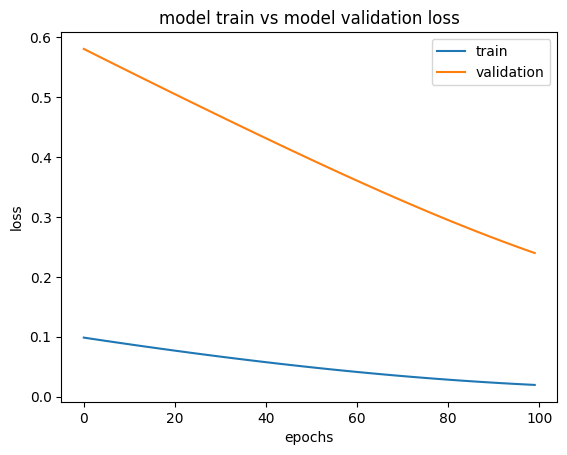

In [21]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

pyplot.title('model train vs model validation loss')

pyplot.ylabel('loss')

pyplot.xlabel('epochs')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [22]:
history = model.fit(X,y, epochs=800, validation_data=(valX,valY), shuffle=False)

Epoch 1/800
1/1 [==============================] - 0s 54ms/step - loss: 0.0191 - val_loss: 0.2371
Epoch 2/800
1/1 [==============================] - 0s 26ms/step - loss: 0.0187 - val_loss: 0.2345
Epoch 3/800
1/1 [==============================] - 0s 27ms/step - loss: 0.0184 - val_loss: 0.2319
Epoch 4/800
1/1 [==============================] - 0s 25ms/step - loss: 0.0180 - val_loss: 0.2294
Epoch 5/800
1/1 [==============================] - 0s 26ms/step - loss: 0.0177 - val_loss: 0.2268
Epoch 6/800
1/1 [==============================] - 0s 25ms/step - loss: 0.0174 - val_loss: 0.2243
Epoch 7/800
1/1 [==============================] - 0s 25ms/step - loss: 0.0171 - val_loss: 0.2218
Epoch 8/800
1/1 [==============================] - 0s 22ms/step - loss: 0.0168 - val_loss: 0.2194
Epoch 9/800
1/1 [==============================] - 0s 24ms/step - loss: 0.0165 - val_loss: 0.2170
Epoch 10/800
1/1 [==============================] - 0s 24ms/step - loss: 0.0162 - val_loss: 0.2146
Epoch 11/800
1/1 [=

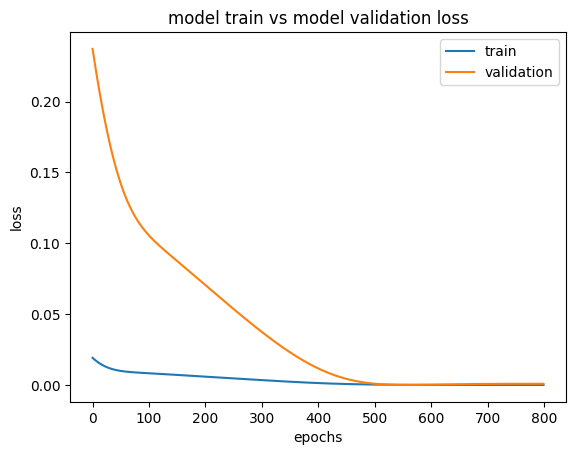

In [23]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

pyplot.title('model train vs model validation loss')

pyplot.ylabel('loss')

pyplot.xlabel('epochs')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [24]:
history = model.fit(X,y, epochs=2500, validation_data=(valX,valY), shuffle=False)

Epoch 1/2500
1/1 [==============================] - 0s 47ms/step - loss: 1.0992e-05 - val_loss: 8.0750e-04
Epoch 2/2500
1/1 [==============================] - 0s 23ms/step - loss: 1.0986e-05 - val_loss: 8.0721e-04
Epoch 3/2500
1/1 [==============================] - 0s 25ms/step - loss: 1.0979e-05 - val_loss: 8.0692e-04
Epoch 4/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.0972e-05 - val_loss: 8.0662e-04
Epoch 5/2500
1/1 [==============================] - 0s 23ms/step - loss: 1.0966e-05 - val_loss: 8.0630e-04
Epoch 6/2500
1/1 [==============================] - 0s 22ms/step - loss: 1.0959e-05 - val_loss: 8.0598e-04
Epoch 7/2500
1/1 [==============================] - 0s 24ms/step - loss: 1.0952e-05 - val_loss: 8.0565e-04
Epoch 8/2500
1/1 [==============================] - 0s 23ms/step - loss: 1.0946e-05 - val_loss: 8.0531e-04
Epoch 9/2500
1/1 [==============================] - 0s 23ms/step - loss: 1.0939e-05 - val_loss: 8.0496e-04
Epoch 10/2500
1/1 [==================

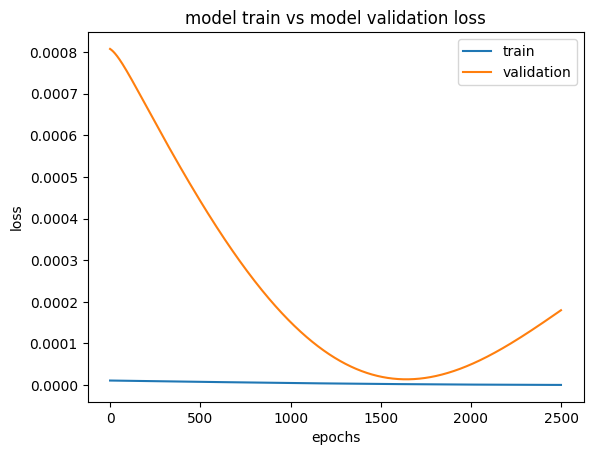

In [25]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])

pyplot.title('model train vs model validation loss')

pyplot.ylabel('loss')

pyplot.xlabel('epochs')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# 7- LSTM Model for Time Series Forecasting: Part 1

In [27]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [28]:
df = pd.read_csv('air_pollution.csv')
df

,date,pollution_today,dew
0,1/2/2010,145.958333,-8.500000
1,1/3/2010,78.833333,-10.125000
2,1/4/2010,31.333333,-20.875000
3,1/5/2010,42.458333,-24.583333
4,1/6/2010,56.416667,-23.708333
...,...,...,...
1820,12/27/2014,238.666667,-9.666667
1821,12/28/2014,197.375000,-10.791667
1822,12/29/2014,159.000000,-12.333333
1823,12/30/2014,46.083333,-13.916667


In [29]:
train_dates = pd.to_datetime(df['date'])
train_dates

0      2010-01-02
1      2010-01-03
2      2010-01-04
3      2010-01-05
4      2010-01-06
          ...    
1820   2014-12-27
1821   2014-12-28
1822   2014-12-29
1823   2014-12-30
1824   2014-12-31
Name: date, Length: 1825, dtype: datetime64[ns]

In [30]:
cols = list(df)[1:3]
cols

['pollution_today', 'dew']

In [31]:
df_for_training = df[cols].astype(float)

df_for_training

,pollution_today,dew
0,145.958333,-8.500000
1,78.833333,-10.125000
2,31.333333,-20.875000
3,42.458333,-24.583333
4,56.416667,-23.708333
...,...,...
1820,238.666667,-9.666667
1821,197.375000,-10.791667
1822,159.000000,-12.333333
1823,46.083333,-13.916667


<Axes: >

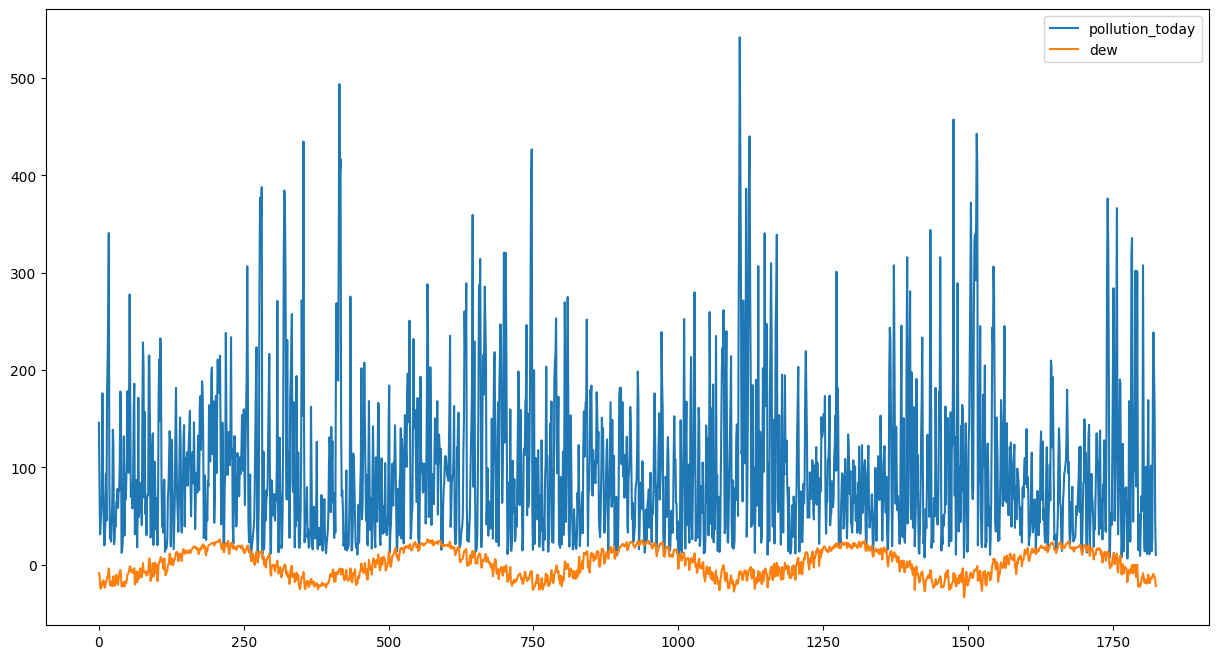

In [32]:
df_for_training.plot.line(figsize=(15,8))

In [33]:
scaler=StandardScaler()
scaler =scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)


df_for_training_scaled

array([[ 0.62137433, -0.72943417],
       [-0.25280106, -0.84419708],
       [-0.87139816, -1.60339785],
       ...,
       [ 0.79121722, -1.00015693],
       [-0.67930748, -1.1119772 ],
       [-1.1486816 , -1.66813591]])

<Axes: >

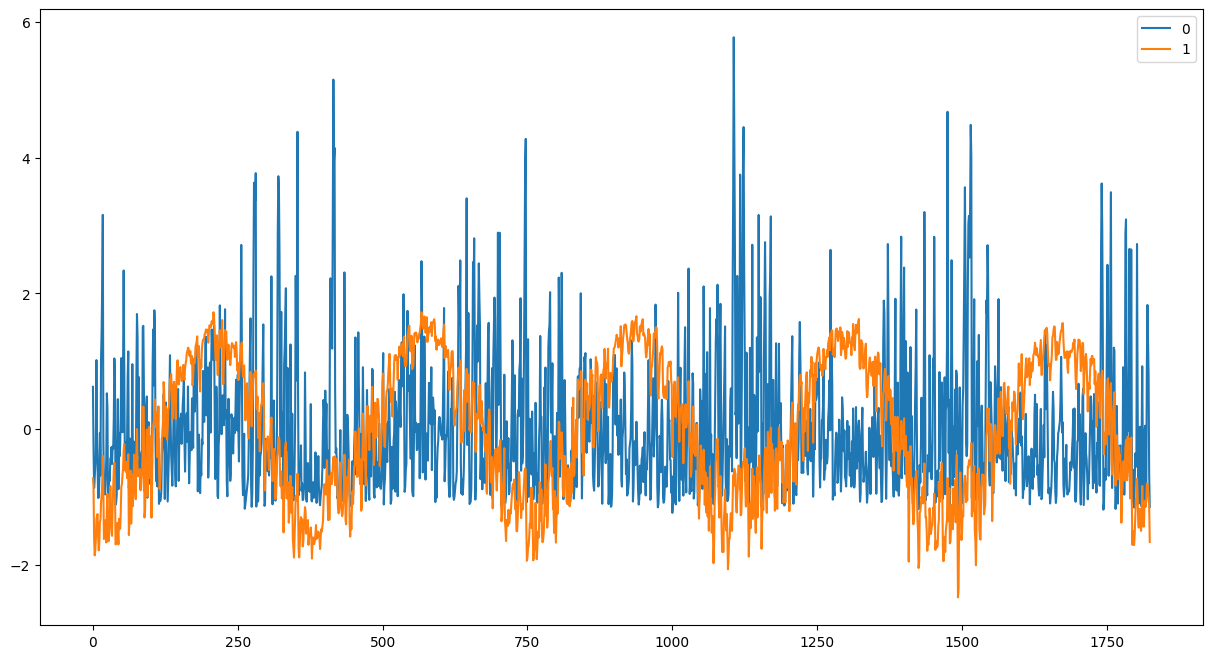

In [36]:
pd.DataFrame(df_for_training_scaled).plot.line(figsize=(15,8))

In [37]:
df_for_training.shape[1]

2

In [38]:
df_for_training_scaled

array([[ 0.62137433, -0.72943417],
       [-0.25280106, -0.84419708],
       [-0.87139816, -1.60339785],
       ...,
       [ 0.79121722, -1.00015693],
       [-0.67930748, -1.1119772 ],
       [-1.1486816 , -1.66813591]])

In [39]:
trainX=[]
trainY=[]

n_future = 1
n_past = 25

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    
trainX, trainY =np.array(trainX), np.array(trainY)

print('trainX shape==={}.'.format(trainX.shape))
print('trainY shape==={}.'.format(trainY.shape))

trainX shape===(1800, 25, 2).
trainY shape===(1800, 1).


In [41]:
trainX[0]

array([[ 0.62137433, -0.72943417],
       [-0.25280106, -0.84419708],
       [-0.87139816, -1.60339785],
       [-0.72651621, -1.8652927 ],
       [-0.54473548, -1.80349728],
       [-0.38086151, -1.6298816 ],
       [ 1.01532301, -1.33856037],
       [-0.12691112, -1.28265024],
       [-0.5338829 , -1.25616649],
       [-1.01899326, -1.5916273 ],
       [-1.00922594, -1.79172673],
       [-0.75581818, -1.67990646],
       [-0.05908249, -1.37387204],
       [-0.68744692, -1.34150301],
       [ 1.0337724 , -1.08255081],
       [ 1.44508521, -0.9825011 ],
       [ 2.10926316, -0.81182805],
       [ 3.15816509, -0.396916  ],
       [-0.16815093, -0.90893513],
       [-0.92728896, -1.62399633],
       [-0.8963591 , -1.45626592],
       [-0.96734775, -1.37975732],
       [-0.74646581, -1.34738829],
       [-0.44310425, -1.67402118],
       [ 0.52603121, -1.21496955]])

In [43]:
trainY[0]

array([0.31370366])

In [44]:
model = Sequential()

# model.add(LSTM(32, activation='relu',input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Bidirectional(LSTM(32,return_sequences=True),input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))

model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 25, 64)            8960      
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 25, 64)            0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 33857 (132.25 KB)
Trainable params: 3385

In [45]:
history= model.fit(trainX,trainY, epochs=62, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/62
102/102 [==============================] - 6s 21ms/step - loss: 0.8971 - val_loss: 0.9015
Epoch 2/62
102/102 [==============================] - 1s 15ms/step - loss: 0.8343 - val_loss: 0.8623
Epoch 3/62
102/102 [==============================] - 1s 15ms/step - loss: 0.7990 - val_loss: 0.8330
Epoch 4/62
102/102 [==============================] - 1s 13ms/step - loss: 0.7644 - val_loss: 0.8046
Epoch 5/62
102/102 [==============================] - 1s 13ms/step - loss: 0.7378 - val_loss: 0.7925
Epoch 6/62
102/102 [==============================] - 1s 13ms/step - loss: 0.7113 - val_loss: 0.7531
Epoch 7/62
102/102 [==============================] - 1s 13ms/step - loss: 0.7100 - val_loss: 0.7306
Epoch 8/62
102/102 [==============================] - 1s 13ms/step - loss: 0.6963 - val_loss: 0.7110
Epoch 9/62
102/102 [==============================] - 1s 13ms/step - loss: 0.6982 - val_loss: 0.6800
Epoch 10/62
102/102 [==============================] - 1s 13ms/step - loss: 0.6876 - val_lo

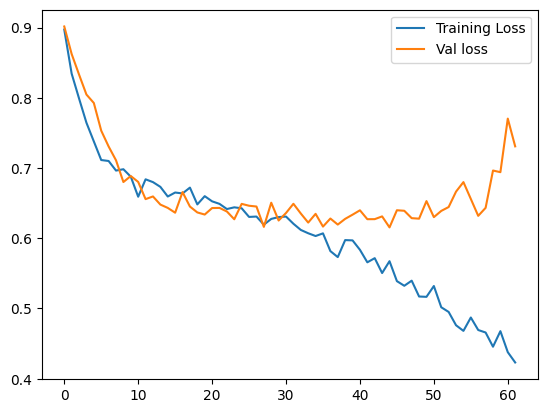

In [46]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()

# 8- LSTM Model for Time Series Forecasting: Part 2

In [47]:
from pandas.tseries.holiday import USFederalHolidayCalendar

from pandas.tseries.offsets import CustomBusinessDay

In [48]:
us_bd=CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [50]:
n_past = 10
n_days_for_prediction=100
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()

In [51]:
prediction = model.predict(trainX[-n_days_for_prediction:])

4/4 [==============================] - 1s 5ms/step


In [52]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [53]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'pollution_today':y_pred_future})
df_forecast['date']=pd.to_datetime(df_forecast['date'])

C:\Users\elisa\AppData\Local\Temp\ipykernel_14988\1610097941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['date']=pd.to_datetime(original['date'])


<Axes: >

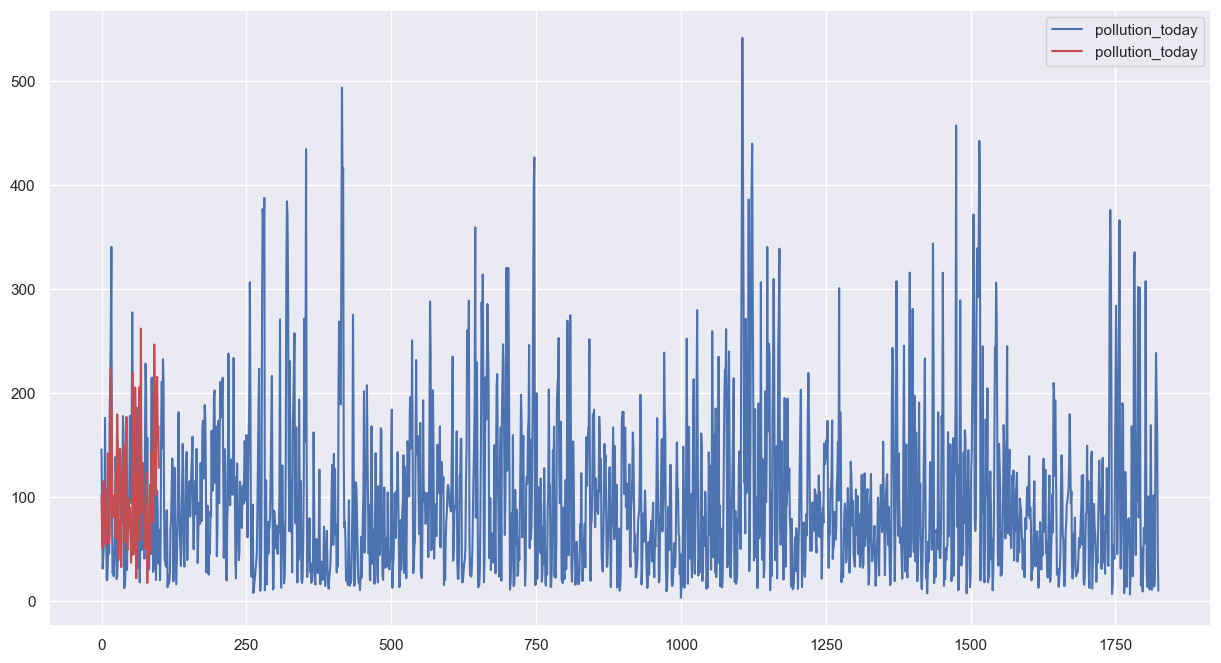

In [59]:
original = df[['date', 'pollution_today']]
original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2010-1-1']

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot((original['date'], original['pollution_today']), palette=['b'])
sns.lineplot((df_forecast['date'], df_forecast['pollution_today']), palette=['r'])

# 9- Featue Understanding in LSTM

# 9- BiLSTM Model for Time Series Forcasting

# 10- Performance Comparison for LSTM and Bi-LSTM 